# Spaceship Titanic: Exploratory Data Analysis + Random Forest Classifier

In this notebook, I will explore the datasets devoted to the challenge called *[Spaceship Titanic](https://www.kaggle.com/competitions/spaceship-titanic/overview)* from Kaggle. It has a train dataset and a test dataset, each of them containing several variables which describe the passengers on a spaceship: their names, ages, cabins and some others:
* `PassengerId` - a unique Id for each passenger. Each Id takes the form *gggg_pp* where *gggg* indicates a group the passenger is travelling with and *pp* is their number within the group. People in a group are often family members, but not always.
* `HomePlanet` - the planet the passenger departed from, typically their planet of permanent residence.
* `CryoSleep` - indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* `Cabin` - the cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* `Destination` - the planet the passenger will be debarking to.
* `Age` - the age of the passenger.
* `VIP` - whether the passenger has paid for special VIP service during the voyage.
* `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* `Name` - the first and last names of the passenger.
* `Transported` - whether the passenger was transported to another dimension. The goal of the challenge is to predict this column.

I will first explore the datasets, and then try to predict which passengers were transported using Random Forest Classifier (sklearn).

## Data Description

In [74]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(palette="pastel")
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Basic Description

First, let's import the data and take a look at the first rows:

In [82]:
train = pd.read_csv('train_titanic.csv')
train.head(10)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True


In [83]:
test = pd.read_csv('test_titanic.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


We might also need the information about the data we have in general:

In [84]:
train.shape

(8693, 14)

We have 8693 observations and 14 columns in the train dataset.

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


We have 8 string (three of them are boolean: True/False) and 6 numerical variables.

In [86]:
train.nunique()

PassengerId     8693
HomePlanet         3
CryoSleep          2
Cabin           6560
Destination        3
Age               80
VIP                2
RoomService     1273
FoodCourt       1507
ShoppingMall    1115
Spa             1327
VRDeck          1306
Name            8473
Transported        2
dtype: int64

Let's look at the string variables in details.

The variables of the boolean type (`CryoSleep`, `VIP`, `Transported`) have only two unique values: True or False. We can also see that such variables as `HomePlanet` and `Destination` have only three categories. As for `PassengerId` and `Name`, all or almost all of their observations are unique. The `Name` variable has some repeating observations since its number of unique values is not 8693 (the number of all observations). It means that we either have people with the same name or we are dealing with missing values there.

In [88]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

We will have to deal with missing values as well, which are about 200 in each of the variables except `PassengerId` and `Transported`.

Those passengers who were transported and those who were not comprise very similar proportions of the dataset:

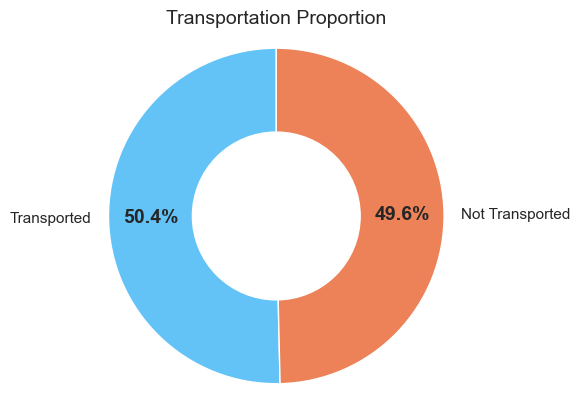

In [89]:
transported_grouped = train.Transported.value_counts(normalize=True)
colors = ['#63c3f7', '#ed8258']

fig, ax = plt.subplots()
wedges, text_labels, autotexts = ax.pie(transported_grouped, labels=['Transported', 'Not Transported'], autopct='%.1f%%', colors=colors, startangle=90, pctdistance=0.75)
plt.setp(autotexts, size=14, weight="bold")

centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig.gca().add_artist(centre_circle)

ax.axis('equal')

plt.title('Transportation Proportion', size=14)
plt.show()

In [90]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


As for the numeric variables,`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa` and `VRDeck` stand out. The median value in all of these variables is 0; however, we can see the maximum value being over 14000 for each of them. The distributions of these variables cannot be normal.

Let's take a look at them in the plots:

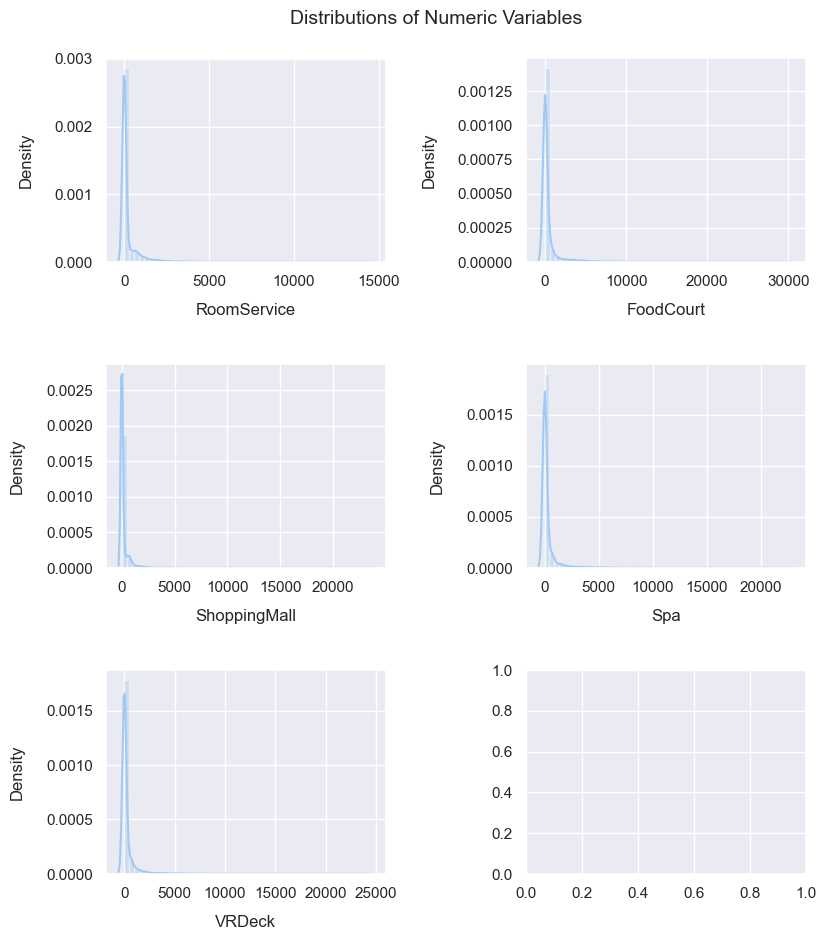

In [91]:
fig, ax = plt.subplots(3, 2, figsize=(10, 12))
plt.subplots_adjust(left=0.2, bottom=0.2, wspace=0.5, hspace=0.5)
sns.distplot(train.RoomService, ax=ax[0, 0])
sns.distplot(train.FoodCourt, ax=ax[0, 1])
sns.distplot(train.ShoppingMall, ax=ax[1, 0])
sns.distplot(train.Spa, ax=ax[1, 1])
sns.distplot(train.VRDeck, ax=ax[2, 0])

ax[0, 0].set_ylabel("Density", labelpad=15, fontsize=12)
ax[1, 0].set_ylabel("Density", labelpad=15, fontsize=12)
ax[2, 0].set_ylabel("Density", labelpad=15, fontsize=12)
ax[0, 1].set_ylabel("Density", labelpad=15, fontsize=12)
ax[1, 1].set_ylabel("Density", labelpad=15, fontsize=12)

ax[0, 0].set_xlabel("RoomService", labelpad=10)
ax[0, 1].set_xlabel("FoodCourt", labelpad=10)
ax[1, 0].set_xlabel("ShoppingMall", labelpad=10)
ax[1, 1].set_xlabel("Spa", labelpad=10)
ax[2, 0].set_xlabel("VRDeck", labelpad=10)

plt.suptitle('Distributions of Numeric Variables', x= 0.53, y=0.92, fontsize=14)

plt.show()

All of these distributions are heavily skewed to the right. We will need to transform them in the future.

Now let's turn to the categorical variables again.

If we look at the `HomePlanet` variable, we will see that more than a half of passengers comes from Earth. Let's also see if one's origin influences their transportation.

In [92]:
train['HomePlanet'].value_counts(normalize=True)

Earth     0.541922
Europa    0.250942
Mars      0.207136
Name: HomePlanet, dtype: float64

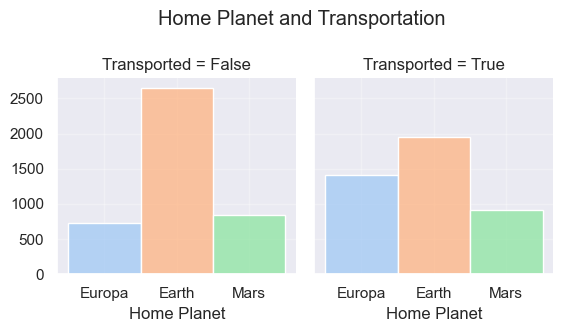

In [93]:
g = sns.FacetGrid(train, col='Transported', hue='HomePlanet')
g.map(sns.histplot, 'HomePlanet')
for ax in g.axes.flatten():
    ax.grid(alpha=0.3)
    ax.set_ylabel('')
g.set_axis_labels('Home Planet')
g.fig.suptitle('Home Planet and Transportation', x=0.55, y=1.1)    
plt.show()

In [94]:
train.groupby('HomePlanet', as_index=False).Transported.mean()

,HomePlanet,Transported
0,Earth,0.423946
1,Europa,0.658846
2,Mars,0.523024


The planet might play an important role in one's transportation since we can see significant differences in numbers. What about the `Destination`?

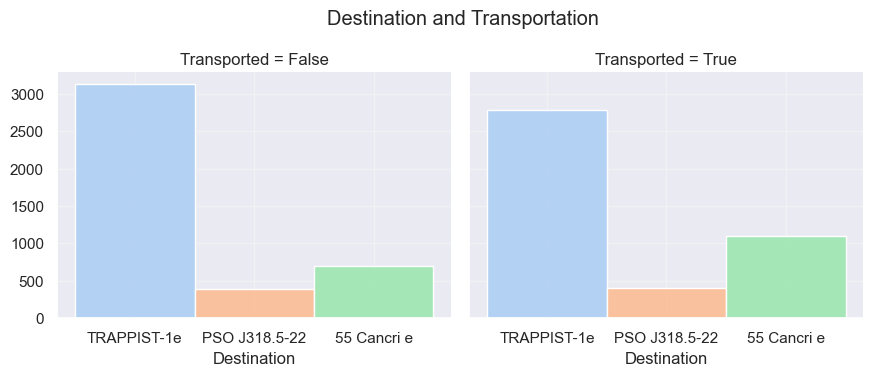

In [95]:
g = sns.FacetGrid(train, col='Transported', hue='Destination', height=3.5, aspect=1.3)
g.map(sns.histplot, 'Destination')
for ax in g.axes.flatten():
    ax.grid(alpha=0.3)
    ax.set_ylabel('')
g.fig.suptitle('Destination and Transportation', x=0.54, y=1.07) 
plt.show()

In [96]:
train.groupby('Destination', as_index=False).Transported.mean()

,Destination,Transported
0,55 Cancri e,0.610000
1,PSO J318.5-22,0.503769
2,TRAPPIST-1e,0.471175


Destination might have importance as well.

Now let's take a look at the `CryoSleep` variable.

In [97]:
train.groupby('CryoSleep', as_index=False).Transported.mean()

,CryoSleep,Transported
0,False,0.328921
1,True,0.817583


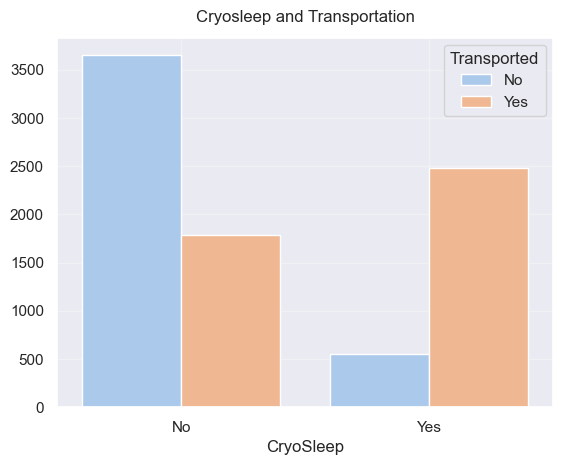

In [98]:
g = sns.countplot(data=train, x='CryoSleep', hue='Transported')
g.grid(alpha=0.3)
g.set_ylabel('')
g.set_xticklabels(['No', 'Yes'])
g.legend(title='Transported', labels=['No', 'Yes'])
g.set_title('Cryosleep and Transportation', y=1.02)
plt.show()

There is a big difference between those who were transported and were in cryosleep and those who were not. It is definitely one of the main variables to predict the transportation.

Let's look at the `VIP` variable.

In [100]:
train.groupby('VIP', as_index=False).Transported.mean()

,VIP,Transported
0,False,0.506332
1,True,0.381910


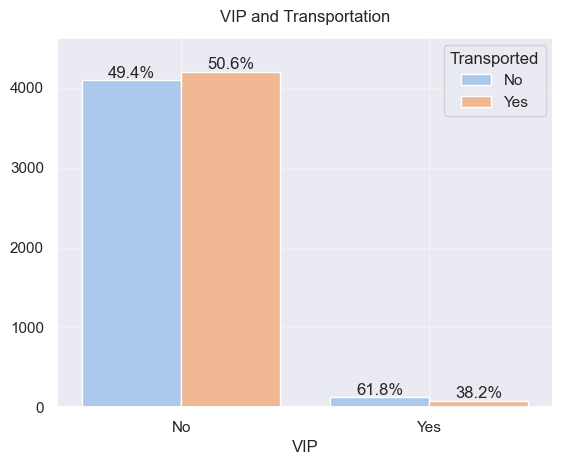

In [101]:
g = sns.countplot(data=train, x='VIP', hue='Transported')
g.grid(alpha=0.3)
g.set_ylabel('')
g.set_xticklabels(['No', 'Yes'])
g.legend(title='Transported', labels=['No', 'Yes'])
g.set_title('VIP and Transportation', y=1.02)

total_counts = train.groupby('VIP').size()
group_counts = train.groupby(['Transported', 'VIP']).size().reset_index(name='Count')
percentages = group_counts.groupby('VIP')['Count'].transform(lambda x: (x / x.sum()) * 100)

for patch, percent, transported in zip(g.patches, percentages, group_counts['Transported']):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_height()
    g.annotate(f'{percent:.1f}%', (x, y), ha='center', va='bottom')
    
ylim = g.get_ylim()
g.set_ylim(ylim[0], ylim[1] + ylim[1] * 0.05)

plt.show()

The VIP status may influence the person's transportation as well.

## Missing Values

Let's look at the missing values again:

In [102]:
train.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [103]:
nonas = train.dropna().shape
nonas

(6606, 14)

If we just drop the missing values, we are left with only 6606 observations instead of 8693! We cannot lose 25% of the train data, so we will try to fill in the missing values. I will first try to fill in the observations where I can be absolutely sure in their values, based on other characteristics.

For example, if the person was in cryosleep, we are sure they did not leave their cabin and did not spend any money on services (`RoomServices`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`). We can also take a look at it from the other side: if a person spent anything on services, they are sure to be awake, and we can fill the missing values for `CryoSleep` as **False** in such cases.

In [104]:
services = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
 
train.loc[(train[services].sum(axis=1) > 0) & train['CryoSleep'].isna(), 'CryoSleep'] = False
train.loc[(train[services].isna().any(axis=1)) & train['CryoSleep'] == True, services] = train.loc[(train[services].isna().any(axis=1))
                                                                                                   & train['CryoSleep'] == True, services].fillna(0)

test.loc[(test[services].sum(axis=1) > 0) & test['CryoSleep'].isna(), 'CryoSleep'] = False
test.loc[(test[services].isna().any(axis=1)) & test['CryoSleep'] == True, services] = test.loc[(test[services].isna().any(axis=1))
                                                                                                   & test['CryoSleep'] == True, services].fillna(0)

Also, we can use the `Age` variable to see for which ages we can fill the services variables with 0. According to the data, children aged 0-12 did not spend anything on services. Let's fill the missing values for such observations:

In [105]:
train.groupby('Age', as_index=False)[services].sum().head(15)

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0
5,5.0,0.0,0.0,0.0,0.0,0.0
6,6.0,0.0,0.0,0.0,0.0,0.0
7,7.0,0.0,0.0,0.0,0.0,0.0
8,8.0,0.0,0.0,0.0,0.0,0.0
9,9.0,0.0,0.0,0.0,0.0,0.0


In [106]:
train.loc[(train['Age'] >= 0) & (train['Age'] < 13), services] = train.loc[(train['Age'] >= 0) & (train['Age'] < 13), services].fillna(0)

test.loc[(test['Age'] >= 0) & (test['Age'] < 13), services] = test.loc[(test['Age'] >= 0) & (test['Age'] < 13), services].fillna(0)

I also wanted to look at the observations where we have missing values for both `services` and for `Cryosleep`. At first, I thought that we could fill the missing values in this subset for sure: in the table below, for each observation we have only one missing value for services, and the others are 0. So, we might assume that we can fill the missing values with 0, and put 'True' for the `CryoSleep` variable.

However, it could be a wrong assumption. From the 'Distributions of numeric variables' graph I remember that a big amount of passengers spent nothing on services being awake. I checked this condition and saw that we indeed have 518 such passengers. Thus, filling the NaNs in this case could be wrong.

In [107]:
train.loc[(train[services].isna().any(axis=1)) & (train['CryoSleep'].isna())]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
111,0115_01,Mars,NaN,F/24/P,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead,True
2402,2584_01,Earth,NaN,G/417/P,PSO J318.5-22,21.0,False,0.0,0.0,NaN,0.0,0.0,Lilace Woodwardy,False
3850,4127_01,Europa,NaN,B/130/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,NaN,Dsch Ainserfle,True
6904,7314_01,Europa,NaN,C/237/P,NaN,33.0,False,0.0,0.0,0.0,NaN,0.0,Aldun Venticable,True
6969,7401_01,Mars,NaN,E/479/P,55 Cancri e,20.0,False,0.0,0.0,NaN,0.0,0.0,Diles Merte,False


In [108]:
train.loc[(train[services].sum(axis=1) == 0) & (train['CryoSleep'] == False)]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
19,0017_01,Earth,False,G/0/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Lyde Brighttt,True
24,0020_04,Earth,False,E/0/S,TRAPPIST-1e,10.0,False,0.0,0.0,0.0,0.0,0.0,Breney Jacostanley,True
26,0020_06,Earth,False,E/0/S,TRAPPIST-1e,7.0,False,0.0,0.0,0.0,0.0,0.0,Terta Mcfaddennon,False
34,0031_02,Mars,False,F/9/P,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Cinets Datie,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8577,9157_06,Earth,False,G/1476/S,TRAPPIST-1e,12.0,False,0.0,0.0,0.0,0.0,0.0,Pamont Navages,False
8637,9219_01,Earth,False,G/1487/S,55 Cancri e,9.0,False,0.0,0.0,0.0,0.0,0.0,Daley Workmanson,False
8654,9231_02,Mars,False,F/1888/P,TRAPPIST-1e,0.0,False,0.0,0.0,0.0,0.0,0.0,Walls Paie,True
8655,9231_03,Mars,False,E/592/P,TRAPPIST-1e,22.0,False,0.0,0.0,0.0,0.0,0.0,Cus Paie,False


Now let's see if we can fill the NaNs for `HomePlanet` and `Destination`.

I will try to find a pattern between these two variables: probably, passengers from a particular planet tend to travel to a particular destination?

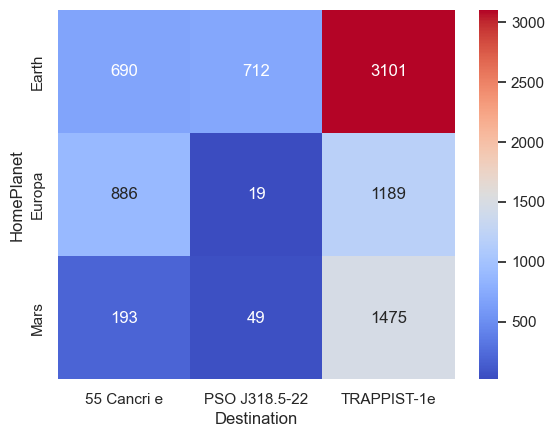

In [109]:
heat = train.groupby(['HomePlanet', 'Destination']).size().unstack()
sns.heatmap(heat, annot=True, fmt='g', cmap='coolwarm')
plt.show()

Based on the heatmap, we can be quite confident in two assumptions:
* Passengers from Mars tend to go to TRAPPIST-1e (86%)
* Passengers who travel to PSO J318.5-22 tend to come from Earth (91%)

Let's fill the missing values according to these conditions:

In [110]:
train.loc[(train['HomePlanet'] == 'Mars') & (train['Destination'].isna()), 'Destination'] = train.loc[(train['HomePlanet'] == 'Mars') & (train['Destination'].isna()), 'Destination'].fillna('TRAPPIST-1e')
train.loc[(train['Destination'] == 'PSO J318.5-22') & (train['HomePlanet'].isna()), 'HomePlanet'] = train.loc[(train['Destination'] == 'PSO J318.5-22') & (train['HomePlanet'].isna()), 'HomePlanet'].fillna('Earth')

test.loc[(test['HomePlanet'] == 'Mars') & (test['Destination'].isna()), 'Destination'] = test.loc[(test['HomePlanet'] == 'Mars') & (test['Destination'].isna()), 'Destination'].fillna('TRAPPIST-1e')
test.loc[(test['Destination'] == 'PSO J318.5-22') & (test['HomePlanet'].isna()), 'HomePlanet'] = test.loc[(test['Destination'] == 'PSO J318.5-22') & (test['HomePlanet'].isna()), 'HomePlanet'].fillna('Earth')

This is where my safe assumptions finish. Still, we managed to fill in the missing values for more than 400 observations!

As for the rest of missing values, I will fill them with the mode (for categorical variables) or the median (for continuous variables). I will not fill in the missing values for `Name` since I am not sure I will need them in the future.

In [111]:
nonas = train.dropna().shape
nonas

(7080, 14)

In [112]:
train[services] = train[services].fillna(0)
train['HomePlanet'] = train['HomePlanet'].fillna(train['HomePlanet'].mode()[0])
train['Destination'] = train['Destination'].fillna(train['Destination'].mode()[0])
train['Age'] = train['Age'].fillna(train['Age'].median())
train['VIP'] = train['VIP'].fillna(train['VIP'].mode()[0])
train['CryoSleep'] = train['CryoSleep'].fillna(train['CryoSleep'].mode()[0])
train['Cabin'] = train['Cabin'].fillna('0/0/0')
train['Deck'] = train.Cabin.apply(lambda x: x.split('/')[0])
train['Deck'].replace(['0'],[train['Deck'].mode()], inplace=True)

test[services] = test[services].fillna(0)
test['HomePlanet'] = test['HomePlanet'].fillna(test['HomePlanet'].mode()[0])
test['Destination'] = test['Destination'].fillna(test['Destination'].mode()[0])
test['Age'] = test['Age'].fillna(test['Age'].median())
test['VIP'] = test['VIP'].fillna(test['VIP'].mode()[0])
test['CryoSleep'] = test['CryoSleep'].fillna(test['CryoSleep'].mode()[0])
test['Cabin'] = test['Cabin'].fillna('0/0/0')
test['Deck'] = test.Cabin.apply(lambda x: x.split('/')[0])
test['Deck'].replace(['0'],[test['Deck'].mode()], inplace=True)

In [113]:
train_clean = train.drop(['Name'], axis=1)

test_clean = test.drop(['Name'], axis=1)

In [114]:
train_clean.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
Deck            0
dtype: int64

Awesome! No missing values, and now we can start modifying the variables.

### Modifying the variables

To make the prediction model more precise, I am going to do the following modifications:
* Apply the Log function to the sum of spendings on services
* Create the `InGroup` variable which will show if the passenger is traveling alone or not
* Divide the passengers into age groups

To transform the services variables, I will apply the *np.log* function to the sum of these variables. Since it is impossible to apply the logarithm to 0, I will apply the function only to those observations where sum of spendings on services is more than 0:

In [115]:
train_clean['ServicesSum'] = train_clean[services].sum(axis=1)
train_clean['LogServices'] = 0
train_clean.loc[train_clean['ServicesSum'] > 0, 'LogServices'] = np.log(train_clean.loc[train_clean['ServicesSum'] > 0, 'ServicesSum'])

test_clean['ServicesSum'] = test_clean[services].sum(axis=1)
test_clean['LogServices'] = 0
test_clean.loc[test_clean['ServicesSum'] > 0, 'LogServices'] = np.log(test_clean.loc[test_clean['ServicesSum'] > 0, 'ServicesSum'])

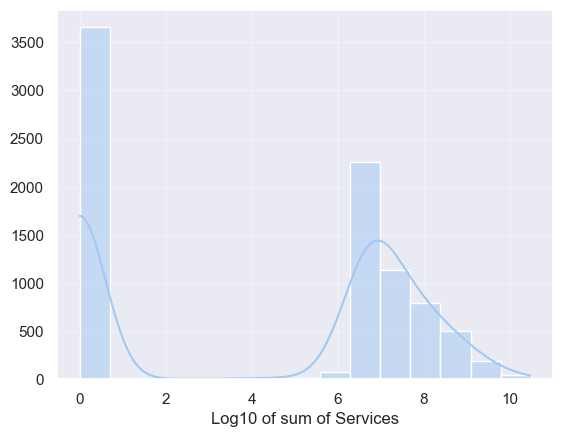

In [116]:
g = sns.histplot(data=train_clean, x='LogServices', kde=True)
g.set_xlabel('Log10 of sum of Services')
g.set_ylabel('')
g.grid(alpha=0.3)
plt.show()

I am also wondering if people who are traveling in a group have a higher transportation chance. Let's look at it by creating a new variable `InGroup`:

In [117]:
# Creating a list of IDs and counting unique IDs:
groups_train = list(train_clean.PassengerId.map(lambda x: x.split('_')[0]))
groups_test = list(test_clean.PassengerId.map(lambda x: x.split('_')[0]))
groups_train_dict = dict(Counter(groups_train))
groups_test_dict = dict(Counter(groups_test))

train_clean['InGroup'] = 0
test_clean['InGroup'] = 0

# The function controls if the group ID is repeated more than once
# and assigns a value (0/1) to the observation in the 'InGroup' column:

def check_group(dataframe, List, dictionary):
    num = 0
    for value in List:
        if dictionary[value] > 1:
            dataframe.loc[num, 'InGroup'] = 1
            num += 1
        else:
            dataframe.loc[num, 'InGroup'] = 0
            num += 1

check_group(train_clean, groups_train, groups_train_dict)
check_group(test_clean, groups_test, groups_test_dict)

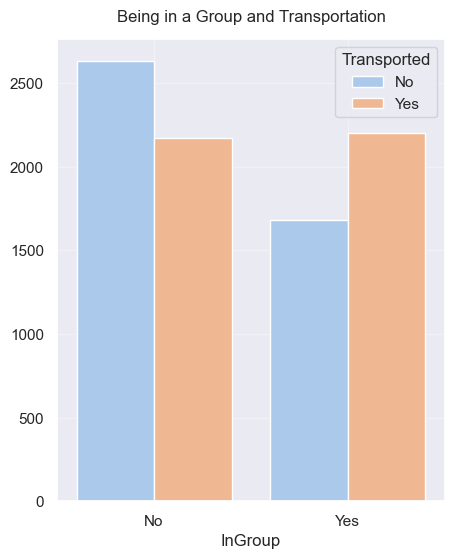

In [118]:
plt.figure(figsize=(5,6))
g = sns.countplot(data=train_clean, x='InGroup', hue='Transported')
g.grid(alpha=0.3)
g.set_xticklabels(['No', 'Yes'])
g.set_ylabel('')
g.legend(title='Transported', labels=['No', 'Yes'])
g.set_title('Being in a Group and Transportation', y=1.02)
plt.show()

People traveling alone have lower chances of being transported.

Let's also divide passengers into groups according to their age:

In [119]:
train_clean['AgeGroup'] = pd.qcut(train_clean['Age'], 5)
test_clean['AgeGroup'] = pd.qcut(test_clean['Age'], 5)
train_clean.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,ServicesSum,LogServices,InGroup,AgeGroup
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0.0,0.000000,0,"(30.0, 40.0]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,736.0,6.601230,0,"(18.0, 24.0]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,10383.0,9.247925,1,"(40.0, 79.0]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,5176.0,8.551788,1,"(30.0, 40.0]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1091.0,6.994850,0,"(-0.001, 18.0]"


In [120]:
train_final = train_clean[['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
                           'LogServices', 'InGroup', 'AgeGroup', 'Deck', 'Transported']]

test_final = test_clean[['HomePlanet', 'CryoSleep', 'Destination', 'VIP',
                           'LogServices', 'InGroup', 'AgeGroup', 'Deck']]

## Model Learning

In [121]:
train_final.head()

,HomePlanet,CryoSleep,Destination,VIP,LogServices,InGroup,AgeGroup,Deck,Transported
0,Europa,False,TRAPPIST-1e,False,0.000000,0,"(30.0, 40.0]",B,False
1,Earth,False,TRAPPIST-1e,False,6.601230,0,"(18.0, 24.0]",F,True
2,Europa,False,TRAPPIST-1e,True,9.247925,1,"(40.0, 79.0]",A,False
3,Europa,False,TRAPPIST-1e,False,8.551788,1,"(30.0, 40.0]",A,False
4,Earth,False,TRAPPIST-1e,False,6.994850,0,"(-0.001, 18.0]",F,True


For now, I know how to use the Random Forest Classifier and how to find the best model using GridSearchCV. I will use these methods to predict the values. But first, I need to convert the categorical variables into factors:

In [122]:
train_final[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroup', 'Deck', 'Transported']] = train_final[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroup', 'Deck', 'Transported']].apply(lambda x: pd.factorize(x)[0])

test_final[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroup', 'Deck']] = test_final[['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'AgeGroup', 'Deck']].apply(lambda x: pd.factorize(x)[0])

In [123]:
train_final.head()

,HomePlanet,CryoSleep,Destination,VIP,LogServices,InGroup,AgeGroup,Deck,Transported
0,0,0,0,0,0.000000,0,0,0,0
1,1,0,0,0,6.601230,0,1,1,1
2,0,0,0,1,9.247925,1,2,2,0
3,0,0,0,0,8.551788,1,0,2,0
4,1,0,0,0,6.994850,0,3,1,1


In [124]:
X_train = train_final.drop(['Transported'], axis=1)
y_train = train_final['Transported']

# params = {'max_depth': range(5, 16, 2), 'min_samples_split': range(10, 31, 5), 'min_samples_leaf': range(1, 10, 2)}
# grid = GridSearchCV(rf, params, cv=5)
# grid.fit(X_train, y_train)
# best_grid = grid.best_estimator_
# grid.best_params_
# GridSearchCV returned the best parameters being the ones I applied below

rf = RandomForestClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=15)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=13, min_samples_leaf=3, min_samples_split=15)

In [125]:
X_test = test_final
predictions = rf.predict(X_test)

In [ ]:
output = pd.DataFrame({'PassengerID': test.PassengerId, 'Transported': predictions})
output['Transported'] = output['Transported'].astype('bool')
output.to_csv('submission.csv', index=False)